# Visualizing the MRI data

In [5]:
import matplotlib.pyplot as plt
import nibabel as nib

In [3]:
mri = nib.load("./ADNI/003_S_0908/Spatially_Normalized,_Masked_and_N3_corrected_T1_image/2014-01-06_13_40_49.0/S210040/mri.nii").get_fdata()

In [6]:
def show_image(image):
    plt.imshow(image)
    
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [7]:
from ipywidgets import interact

@interact(position=(0,100))
def update(position=50):
    return show_image(mri[position])

interactive(children=(IntSlider(value=50, description='position'), Output()), _dom_classes=('widget-interact',…

# Visualising the Clinical datasets

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib as plt

In [2]:
bas_clin = pd.read_csv("./bas_clin_with_categorical.csv")

In [3]:
lon_clin = pd.read_csv("./lon_clin_with_categorical.csv")

In [4]:
bas_clin.head()

,Image Data ID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
0,420849,62.9,Female,16,Not Hisp/Latino,White,0.0,1.5,8.0,11.0,42.0,10.0,1.0,7.69231,sMCI
1,786087,85.9,Male,16,Not Hisp/Latino,White,0.0,0.0,5.0,8.0,39.0,7.0,2.0,18.18180,sMCI
2,537823,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,12.0,23.0,28.0,2.0,6.0,85.71430,pMCI
3,537826,61.0,Female,12,Not Hisp/Latino,White,1.0,3.5,26.0,38.0,20.0,2.0,5.0,100.00000,sMCI
4,537827,72.6,Male,12,Not Hisp/Latino,White,1.0,8.0,18.0,29.0,22.0,4.0,5.0,83.33330,sMCI


In [5]:
lon_clin[lon_clin["Image Data ID"] == 397037]

,Image Data ID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
594,397037,72.7,Female,12,Not Hisp/Latino,White,1.0,0.0,11.0,14.0,31.0,6.0,9.0,100.0,CN


In [28]:
lon_clin.head()

,Image Data ID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
0,420849,62.9,Female,16,Not Hisp/Latino,White,0.0,1.5,8.0,11.0,42.0,10.0,1.0,7.69231,sMCI
1,786087,85.9,Male,16,Not Hisp/Latino,White,0.0,0.0,5.0,8.0,39.0,7.0,2.0,18.18180,sMCI
2,537823,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,12.0,23.0,28.0,2.0,6.0,85.71430,pMCI
3,537826,61.0,Female,12,Not Hisp/Latino,White,1.0,3.5,26.0,38.0,20.0,2.0,5.0,100.00000,sMCI
4,537827,72.6,Male,12,Not Hisp/Latino,White,1.0,8.0,18.0,29.0,22.0,4.0,5.0,83.33330,sMCI


In [30]:
lon_clin["PTRACCAT"].unique()

array(['White', 'Black', 'Asian', 'More than one', 'Am Indian/Alaskan'],
      dtype=object)

/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

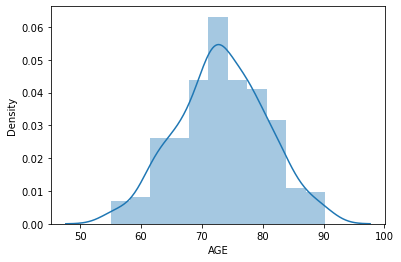

In [6]:
sns.distplot(bas_clin["AGE"])

## Baseline Data investigation

### CN vs AD visualization

In [7]:
cn_df = bas_clin[bas_clin["label"] == "CN"]
ad_df = bas_clin[bas_clin["label"] == "AD"]

/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

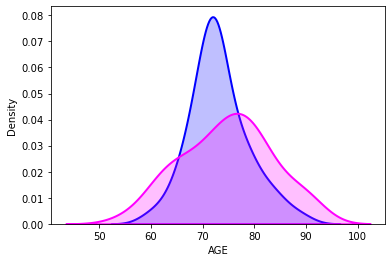

In [8]:
kde_kws = {"color": "blue", "lw": 2, "label": "CN", "shade":True}
sns.distplot(cn_df["AGE"], kde_kws=kde_kws, hist=False)

kde_kws = {"color": "magenta", "lw": 2, "label": "AD", "shade":True}
sns.distplot(ad_df["AGE"], color="magenta", kde_kws=kde_kws, hist=False)

### sMCI vs pMCI visualization

In [9]:
sMCI_df = bas_clin[bas_clin["label"] == "sMCI"]
pMCI_df = bas_clin[bas_clin["label"] == "pMCI"]

/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

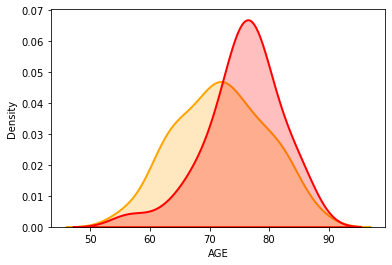

In [10]:
kde_kws = {"color": "orange", "lw": 2, "label": "sMCI", "shade":True}
sns.distplot(sMCI_df["AGE"], kde_kws=kde_kws, hist=False)

kde_kws = {"color": "red", "lw": 2, "label": "pMCI", "shade":True}
sns.distplot(pMCI_df["AGE"], color="magenta", kde_kws=kde_kws, hist=False)

/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

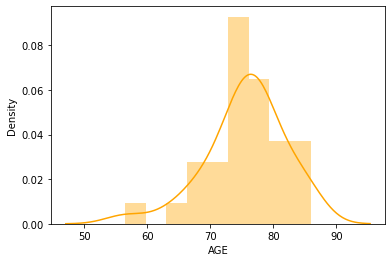

In [11]:
pMCI_df = bas_clin[bas_clin["label"] == "pMCI"]
sns.distplot(pMCI_df["AGE"], color="orange", )

/home/dan/miniconda3/envs/cam-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CDRSB', ylabel='Density'>

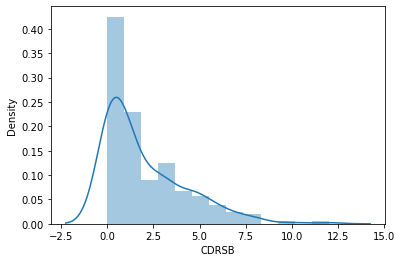

In [12]:
sns.distplot(bas_clin["CDRSB"])

<AxesSubplot:xlabel='label', ylabel='AGE'>

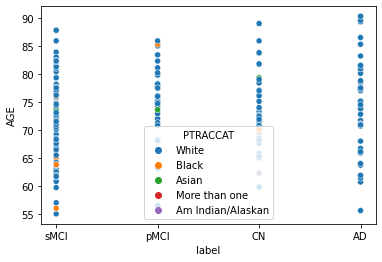

In [13]:
sns.scatterplot(x='label', y='AGE', data=bas_clin, hue="PTRACCAT")

In [14]:
sns.

SyntaxError: invalid syntax (<ipython-input-14-40c5c93bca4b>, line 1)

## Longitudinal data investigation

In [15]:
lon_clin.head()

,Image Data ID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
0,420849,62.9,Female,16,Not Hisp/Latino,White,0.0,1.5,8.0,11.0,42.0,10.0,1.0,7.69231,sMCI
1,786087,85.9,Male,16,Not Hisp/Latino,White,0.0,0.0,5.0,8.0,39.0,7.0,2.0,18.18180,sMCI
2,537823,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,12.0,23.0,28.0,2.0,6.0,85.71430,pMCI
3,537826,61.0,Female,12,Not Hisp/Latino,White,1.0,3.5,26.0,38.0,20.0,2.0,5.0,100.00000,sMCI
4,537827,72.6,Male,12,Not Hisp/Latino,White,1.0,8.0,18.0,29.0,22.0,4.0,5.0,83.33330,sMCI


In [16]:
lon_cn_df   = lon_clin[lon_clin["label"] == "CN"]
lon_smci_df = lon_clin[lon_clin["label"] == "sMCI"]
lon_pmci_df = lon_clin[lon_clin["label"] == "pMCI"]
lon_ad_df   = lon_clin[lon_clin["label"] == "AD"]

In [17]:
lon_cn_df.describe()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,399686.744395,73.146637,16.421525,0.322870,0.233184,5.669686,8.965650,43.085202,5.412556,4.502242,45.610289
std,124266.544754,5.889139,2.747953,0.468625,0.853911,3.546529,5.342214,10.008866,2.254170,2.686091,28.854086
min,298790.000000,59.800000,10.000000,0.000000,0.000000,1.000000,1.000000,18.000000,-1.000000,-2.000000,-20.000000
25%,334768.500000,70.100000,14.000000,0.000000,0.000000,3.000000,5.500000,37.000000,4.000000,3.000000,25.000000
50%,356743.000000,72.500000,16.000000,0.000000,0.000000,5.000000,9.000000,44.000000,5.000000,5.000000,44.444400
75%,413158.000000,76.200000,19.000000,1.000000,0.000000,7.000000,11.000000,49.000000,7.000000,6.000000,66.666700
max,845683.000000,89.000000,20.000000,1.000000,6.000000,22.000000,32.000000,71.000000,12.000000,13.000000,100.000000


In [18]:
lon_smci_df.describe()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,400374.103627,71.574352,16.020725,0.608808,1.371762,8.581166,13.767694,34.870466,4.569948,4.756477,57.816525
std,130295.640019,7.429369,2.686104,0.702371,1.005701,4.094181,6.137467,10.231543,2.138461,2.437323,31.243362
min,298789.000000,55.000000,11.000000,0.000000,0.000000,1.000000,2.000000,14.000000,-1.000000,-4.000000,-36.363600
25%,298988.750000,66.300000,14.000000,0.000000,0.500000,5.000000,9.000000,28.000000,3.000000,3.000000,36.363600
50%,356752.000000,71.800000,16.000000,0.000000,1.000000,8.000000,13.500000,34.500000,4.000000,5.000000,57.142900
75%,420868.500000,76.600000,18.000000,1.000000,2.000000,11.000000,17.000000,40.000000,6.000000,6.000000,85.714300
max,880419.000000,87.800000,20.000000,2.000000,8.000000,26.000000,38.000000,70.000000,11.000000,12.000000,100.000000


In [19]:
lon_pmci_df.describe()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,393148.580645,74.982581,15.948387,0.929032,2.735484,13.780645,22.167742,26.445161,2.677419,5.032258,81.914237
std,108400.829754,6.037460,2.637870,0.625328,1.726709,5.757289,7.918267,7.788721,1.783530,2.039924,27.833966
min,298805.000000,56.500000,12.000000,0.000000,0.500000,3.000000,7.000000,6.000000,-1.000000,-1.000000,-20.000000
25%,334797.500000,72.000000,14.000000,1.000000,1.500000,9.000000,16.000000,20.000000,1.000000,4.000000,70.833350
50%,356759.000000,75.300000,16.000000,1.000000,2.500000,14.000000,23.000000,26.000000,2.000000,5.000000,100.000000
75%,413170.500000,78.100000,18.000000,1.000000,3.500000,17.000000,27.000000,32.000000,4.000000,6.000000,100.000000
max,812591.000000,85.900000,20.000000,2.000000,12.000000,32.000000,45.000000,43.000000,7.000000,10.000000,100.000000


In [20]:
lon_ad_df.describe()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,371686.935065,75.142857,15.636364,0.831169,5.233766,22.201299,32.701299,20.116883,1.649351,4.155844,93.876006
std,52242.521275,8.503485,2.832625,0.674515,2.011543,7.228647,8.637303,6.409703,1.795173,1.661285,12.383018
min,298792.000000,55.600000,9.000000,0.000000,1.000000,9.000000,17.000000,4.000000,-2.000000,1.000000,50.000000
25%,356630.500000,70.700000,13.000000,0.000000,4.500000,16.000000,27.000000,16.000000,1.000000,3.000000,100.000000
50%,366708.000000,75.100000,16.000000,1.000000,5.000000,22.000000,32.000000,20.000000,1.000000,4.000000,100.000000
75%,397003.750000,81.275000,18.000000,1.000000,6.000000,26.000000,38.000000,24.000000,3.000000,5.000000,100.000000
max,812585.000000,90.300000,20.000000,2.000000,14.000000,46.000000,60.000000,35.000000,7.000000,9.000000,100.000000
